# Simple Linear Regression
 - Method for predicting a quantitative response using a single feauture

### Importing the Libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#checking version
#double undescore->dunder
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

0.25.1
1.17.2
0.9.0


In [3]:
#loading the data set from sklearn library
from sklearn.datasets import load_boston
boston=load_boston()
#Displays a dictionary

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
#Displays keys of boston dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#Now we access the data
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target
#target->output

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston.filename

'c:\\users\\srinaja\\miniconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [10]:
#Creating a DataFrame
boston_df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
#We have added target values to the data frame giving the name of the column as MEDV
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston_df.shape

(506, 14)

In [13]:
boston_df.describe().T
#column names are interchaged as rows and rows are interchanged to become columns

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

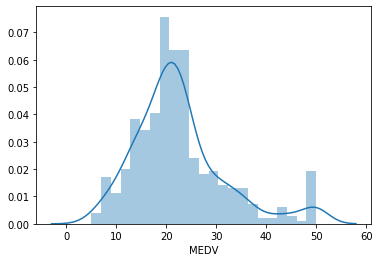

In [15]:
sns.distplot(boston_df['MEDV'])

In [16]:
#Input->RM
#Output->MEDV

In [17]:
X = boston_df[["RM"]] #selecting the column as data frame
y=  boston_df["MEDV"]

In [18]:
boston_df["MEDV"] #selecting the column as series

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

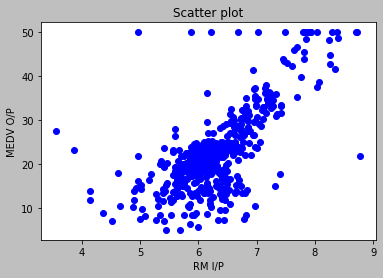

In [19]:
#plt.style.available
with plt.style.context('grayscale') : #Temporary styling
    plt.plot(X,y,'bo')
    plt.xlabel('RM I/P')
    plt.ylabel('MEDV O/P')
    plt.title('Scatter plot')

In [20]:
## usual sklearn: import enstantiate,fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # to consider it as a class give paranthesis
lm.fit(X,y)  # STNTAX:- Objectname.fit(input,output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# print the intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

-34.670620776438554
[9.10210898]


### interpriting the model:
A unit increase in x(RM) is associated with 9.10210898 unit increase in MEDV

In [22]:
## pipeline-- > first we create a model on the data
## second we need to compare the model(predicted values with actual values)

In [23]:
# with help of predict, we are going to find out predicted values
y_pred=lm.predict(X)
y_pred

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [24]:
## compare the actual values with the predicted values
from sklearn.metrics import r2_score
r2_score(y,y_pred) # r2_score(actualvalue,predicted values)

0.48352545599133423

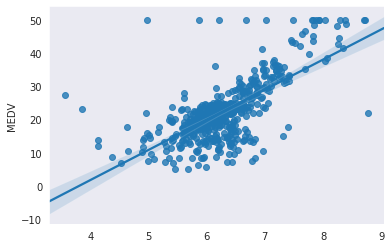

In [25]:
## observe the regression line 
with sns.axes_style("dark"): #temporart style 
    sns.regplot(X,y)

Text(0, 0.5, 'MEDV O/P')

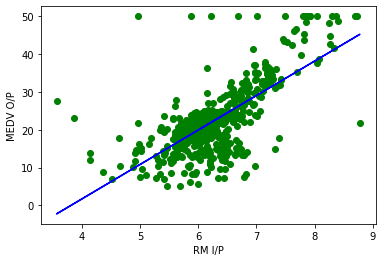

In [26]:
## scatterplot
# first making a scatter plot for the original data(X and y)
# we need to plot a line for predicted values(X,y_pred)
plt.scatter(X,y,color="green")
plt.plot(X,y_pred,color="blue")
plt.xlabel("RM I/P")
plt.ylabel("MEDV O/P")

In [27]:
# RM as input , 48%

In [28]:
# to evaluate the model is working with unseen data???
## we will take a single value of RM and we will check the prediction on that 
## thake any rm value and check the house value

In [29]:
lm.predict([[6.75]])

array([26.76861485])

In [30]:
#predicting the single values of RM
lm.predict([[6.75]])
#pass the dataset inside the predict function

array([26.76861485])

In [ ]:
# Assignmnet : To choose any 1 column from rm and build a simple linear regression model
# build the model again